In [23]:
# Intro to Machine Learning CS 4347   Chichi Christine
import numpy as np
np.seterr(divide='ignore')
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')
data.apply(lambda x: sum(x.isnull()),axis=0) 
# checking missing values in each column of train dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
LoanStatus            0
dtype: int64

In [23]:
# the correlation matrix for the dataset 
sns.heatmap(data.corr())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
LoanStatus            0
dtype: int64

In [24]:
data.Gender = data.Gender.fillna('Male')
data.Married = data.Married.fillna('Yes')
data.Dependents = data.Dependents.fillna('0')
data.Self_Employed = data.Self_Employed.fillna('No')
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)
data.Credit_History = data.Credit_History.fillna(1.0)
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanStatus           0
dtype: int64

array([[ 46,   0],
       [  0, 108]], dtype=int64)

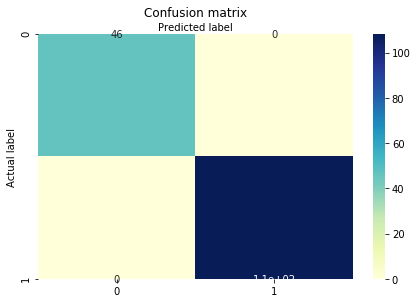

In [25]:
y = data['LoanStatus']
# Clean data
# Replace the categorical values with the numeric equivalents 
categoricalFeatures = ['Loan_ID', 'Property_Area', 'Gender', 'Married', 'Dependents', 
                       'Education', 'Self_Employed', 'LoanStatus']

# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(data[feature], prefix=feature)
    data = data.drop(feature, axis=1)  # drop the column
    data = data.join(onehot)
    
# Instantiate a Logistic Regression object and split the dataset 75-25, train-test
# Liblinear is a solver for smaller datasets.
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

# feature scaling
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
featurex = data[data.columns[~data.columns.isin(['LoanStatus'])]] #Except Label

X_train,X_test,y_train,y_test = train_test_split(featurex, y, test_size=0.25)

# Fit the model to the training data.
lr.fit(X_train, y_train)

# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(X_test)

# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
confusion_matrix


In [26]:
confusion_matrix
accu = metrics.accuracy_score(y_pred, y_test)
print(accu)

1.0
